In [1]:
import pandas as pd
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the Batters CSV file into a pandas DataFrame
df = pd.read_csv("Batters_Training_Data.csv")

In [3]:
# shuffle the DataFrame rows
df = df.sample(frac = 1)

In [4]:
# Replace all NaN values with 0
df = df.fillna(0)

In [5]:
# Create the training set with the specified columns
training_features = df.drop(["Name", "AAV", "Years"], axis=1)

In [6]:
# One Hot Encoding for "Position"
encoder = OneHotEncoder(sparse=False)
encoded_positions = encoder.fit_transform(df[["Position"]])
position_columns = [f"Position_{category}" for category in encoder.categories_[0]]
for i, col in enumerate(position_columns):
    training_features[col] = encoded_positions[:, i]

# Drop the "Position" column
training_features = training_features.drop("Position", axis=1)

In [7]:
training_features

,PA,BB_pct,K_pct,BB_K,OBP,ISO,GB_FB,LD_pct,GB_pct,FB_pct,...,Position_2b,Position_3b,Position_c,Position_cf,Position_dh,Position_inf,Position_lf,Position_of,Position_rf,Position_ss
195,434.00,8.950,30.825,0.2925,0.30625,0.20825,0.7300,21.600,32.850,45.550,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99,600.50,12.300,20.175,0.6225,0.38525,0.16300,1.5475,21.625,47.350,31.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
100,397.25,7.925,14.050,0.5675,0.33300,0.07575,2.5750,23.725,54.625,21.650,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,554.25,12.825,22.300,0.5775,0.36975,0.15050,1.2100,23.075,42.100,34.825,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
213,493.00,11.225,15.925,0.7075,0.36875,0.17625,1.4050,18.625,47.350,34.075,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,552.50,4.700,10.775,0.4375,0.32975,0.11925,1.1525,21.025,42.175,36.775,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,450.50,7.725,20.350,0.3850,0.32250,0.08200,2.1575,20.500,54.300,25.225,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,265.75,5.825,27.050,0.2100,0.30200,0.18150,1.0925,21.250,40.600,38.150,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
77,460.25,9.375,17.075,0.5425,0.34450,0.17600,0.9250,20.875,37.600,41.525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Select the training features and target variables
X = training_features
y_aav = df["AAV"]
y_years = df["Years"]

In [9]:
mae_values = []

for num_columns in range(1, 40):
    # Perform forward feature selection
    selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=num_columns, direction='forward')
    X_selected = selector.fit_transform(X, y_aav)

    # Fit a linear regression model
    model_aav = LinearRegression()
    predicted_aav = cross_val_predict(model_aav, X_selected, y_aav, cv=10)
    
    # Calculate MAE for AAV estimation
    mae_aav = mean_absolute_error(y_aav, predicted_aav)
    mae_values.append(mae_aav)

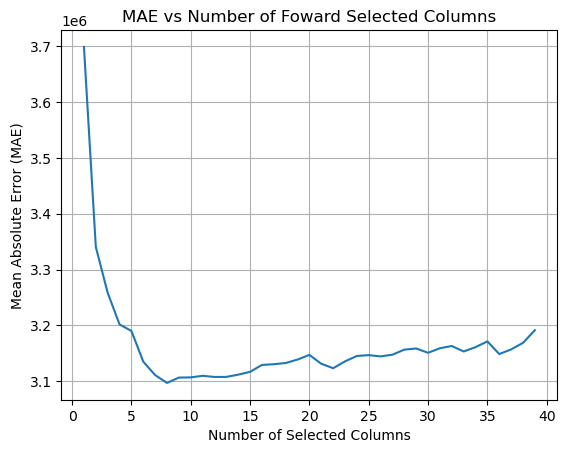

In [10]:
# Create a DataFrame to store the MAE values
mae_df = pd.DataFrame({'Num_Columns': range(1, 40), 'MAE': mae_values})

# Plotting the MAE values
plt.plot(mae_df['Num_Columns'], mae_df['MAE'])
plt.xlabel('Number of Selected Columns')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs Number of Foward Selected Columns')
plt.grid(True)
plt.show()

In [11]:
print(mae_df.iloc[7])

Num_Columns    8.000000e+00
MAE            3.097177e+06
Name: 7, dtype: float64


In [12]:
mae_values = []

for num_columns in range(1, 40):
    # Perform forward feature selection
    selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=num_columns, direction='backward')
    X_selected = selector.fit_transform(X, y_aav)

    # Fit a linear regression model
    model_aav = LinearRegression()
    predicted_aav = cross_val_predict(model_aav, X_selected, y_aav, cv=10)

    # Calculate MAE for AAV estimation
    mae_aav = mean_absolute_error(y_aav, predicted_aav)
    mae_values.append(mae_aav)

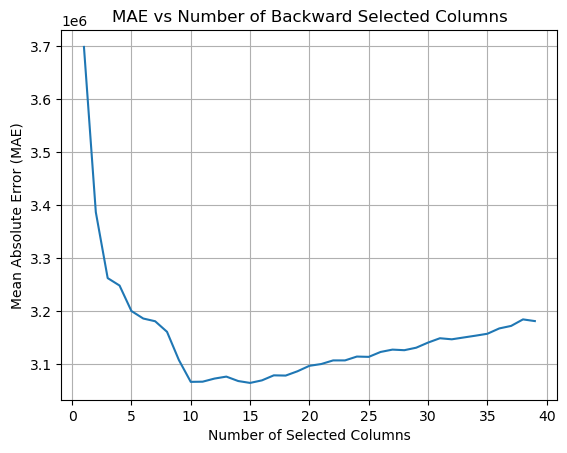

In [13]:
# Create a DataFrame to store the MAE values
mae_df = pd.DataFrame({'Num_Columns': range(1, 40), 'MAE': mae_values})

# Plotting the MAE values
plt.plot(mae_df['Num_Columns'], mae_df['MAE'])
plt.xlabel('Number of Selected Columns')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs Number of Backward Selected Columns')
plt.grid(True)
plt.show()

In [14]:
print(mae_df.iloc[9])
print(mae_df.iloc[14])

Num_Columns    1.000000e+01
MAE            3.066135e+06
Name: 9, dtype: float64
Num_Columns    1.500000e+01
MAE            3.064143e+06
Name: 14, dtype: float64


In [15]:
# Calculate final predictions using 15 backward selected features
# Perform forward feature selection
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=15, direction='backward')
X_selected = selector.fit_transform(X, y_aav)

In [16]:
# Get the selected feature indices
selected_feature_indices = selector.support_

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['GB_pct', 'FB_pct', 'WAR', 'wRC_plus', 'RE24', 'Z-Swing_pct',
       'Z-Contact_pct', 'BsR', 'Off', 'Soft_pct', 'Age', 'Position_2b',
       'Position_c', 'Position_of', 'Position_ss'],
      dtype='object')


In [17]:
# Fit a linear regression model
model_aav = LinearRegression()
predicted_aav = cross_val_predict(model_aav, X_selected, y_aav, cv=10)

# Calculate the difference between predicted and actual AAV
difference_aav = predicted_aav - y_aav

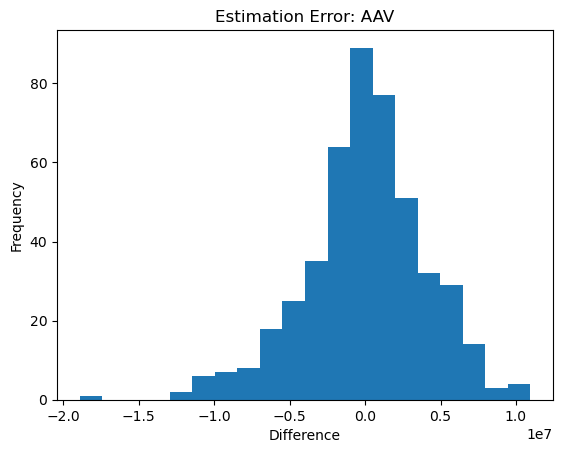

In [18]:
# Plot a histogram of the differences between predicted and actual AAV
plt.hist(difference_aav, bins=20)
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.title("Estimation Error: AAV")
plt.show()

In [19]:
mae_values = []

for num_columns in range(1, 40):
    # Perform forward feature selection
    selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=num_columns, direction='forward')
    X_selected = selector.fit_transform(X, y_years)

    # Fit a linear regression model
    model_years = LinearRegression()
    predicted_years = cross_val_predict(model_years, X_selected, y_years, cv=10)

    # Calculate MAE for Years estimation
    mae_years = mean_absolute_error(y_years, predicted_years)
    mae_values.append(mae_years)

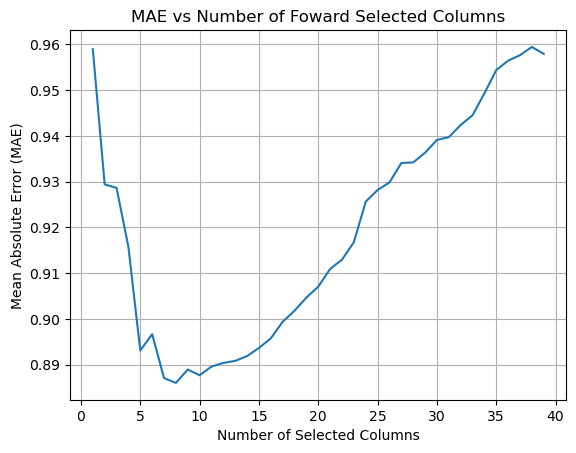

In [20]:
# Create a DataFrame to store the MAE values
mae_df_years = pd.DataFrame({'Num_Columns': range(1, 40), 'MAE': mae_values})

# Plotting the MAE values
plt.plot(mae_df_years['Num_Columns'], mae_df_years['MAE'])
plt.xlabel('Number of Selected Columns')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs Number of Foward Selected Columns')
plt.grid(True)
plt.show()

In [21]:
print(mae_df_years.iloc[7])

Num_Columns    8.000000
MAE            0.886006
Name: 7, dtype: float64


In [22]:
mae_values = []

for num_columns in range(1, 40):
    # Perform forward feature selection
    selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=num_columns, direction='backward')
    X_selected = selector.fit_transform(X, y_years)

    # Fit a linear regression model
    model_years = LinearRegression()
    predicted_years = cross_val_predict(model_years, X_selected, y_years, cv=10)

    # Calculate MAE for Years estimation
    mae_years = mean_absolute_error(y_years, predicted_years)
    mae_values.append(mae_years)

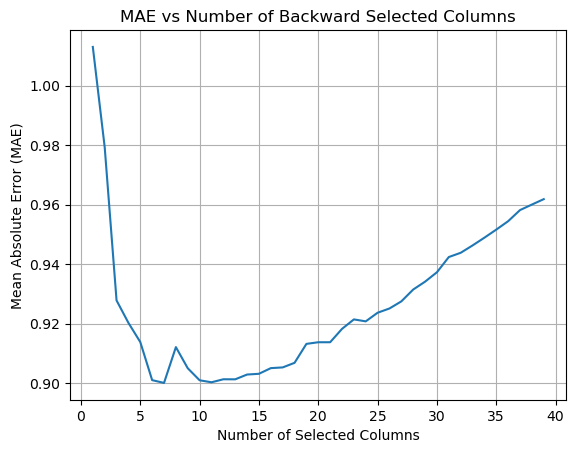

In [23]:
# Create a DataFrame to store the MAE values
mae_df_years = pd.DataFrame({'Num_Columns': range(1, 40), 'MAE': mae_values})

# Plotting the MAE values
plt.plot(mae_df_years['Num_Columns'], mae_df_years['MAE'])
plt.xlabel('Number of Selected Columns')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs Number of Backward Selected Columns')
plt.grid(True)
plt.show()

In [24]:
print(mae_df_years.iloc[7])
print(mae_df_years.iloc[10])

Num_Columns    8.000000
MAE            0.912142
Name: 7, dtype: float64
Num_Columns    11.000000
MAE             0.900328
Name: 10, dtype: float64


In [25]:
# Calculate final predictions using 8 foward selected features
# Perform forward feature selection
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=8, direction='forward')
X_selected = selector.fit_transform(X, y_years)

In [26]:
# Get the selected feature indices
selected_feature_indices = selector.support_

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['WAR', 'wRC_plus', 'Off', 'Med_pct', 'Age', 'Position_c', 'Position_rf',
       'Position_ss'],
      dtype='object')


In [27]:
# Perform cross-validation with a 80/20 split and predict Years
model_years = LinearRegression()
predicted_years = cross_val_predict(model_years, X_selected, y_years, cv=10)

# Calculate the absolute difference between predicted and actual Years
difference_years = predicted_years - y_years

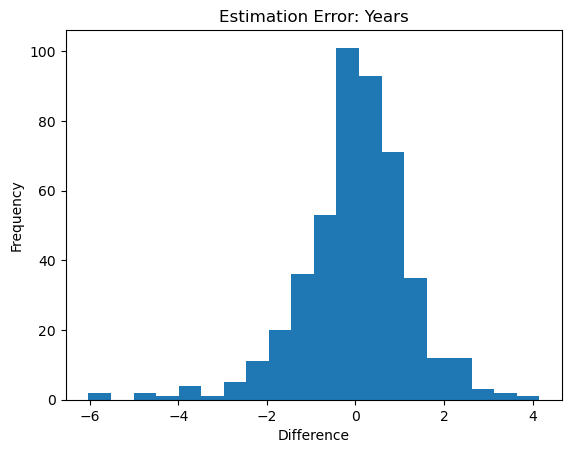

In [28]:
# Plot a histogram of the differences between predicted and actual Years
plt.hist(difference_years, bins=20)
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.title("Estimation Error: Years")
plt.show()

In [29]:
# Create a DataFrame for the model predictions and differences
batter_model_predictions = df[["Name", "AAV", "Years"]].copy()

# Add the predicted AAV and AAV difference columns
batter_model_predictions["Predicted_AAV"] = predicted_aav
batter_model_predictions["AAV_Difference"] = difference_aav

# Add the predicted Years and Years difference columns
batter_model_predictions["Predicted_Years"] = predicted_years
batter_model_predictions["Years_Difference"] = difference_years

# Export the DataFrame to a CSV file
batter_model_predictions.to_csv("Batter_Model_Predictions.csv", index=False)

In [30]:
# Read the Starting Pitchers CSV file into a pandas DataFrame
df = pd.read_csv("SP_Training_Data.csv")

In [31]:
# Replace all NaN values with 0
df = df.fillna(0)

In [32]:
# shuffle the DataFrame rows
df = df.sample(frac = 1)

In [33]:
# Create the training set with the specified columns
training_features = df.drop(["Name", "AAV", "Years", "Position"], axis=1)

In [34]:
training_features

,W,L,ERA,GS,CG,ShO,IP,TBF,Balls,Strikes,...,FDP-Wins,K-BB_pct,Pull_pct,Cent_pct,Oppo_pct,Soft_pct,Med_pct,Hard_pct,TTO_pct,Age
58,9.500000,12.00,4.990000,28.50,0.000000,0.00,154.000000,677.000000,1013.00,1726.500000,...,-0.650000,9.600,35.450000,38.150000,26.400000,15.150000,52.650000,32.250000,31.400000,30
123,11.500000,8.00,3.742500,29.25,0.000000,0.00,176.375000,738.500000,942.50,1886.500000,...,0.600000,12.625,39.325000,33.175000,27.500000,17.475000,52.800000,29.700000,27.600000,30
126,6.500000,10.75,3.797500,25.75,0.750000,0.75,150.925000,641.250000,868.00,1581.000000,...,-0.775000,11.375,33.975000,38.425000,27.625000,15.075000,53.475000,31.425000,28.675000,30
80,14.500000,9.75,3.175000,33.50,4.250000,1.75,232.875000,951.000000,1298.75,2321.750000,...,1.025000,15.475,44.350000,34.175000,21.475000,16.975000,54.900000,28.100000,30.275000,33
144,6.333333,9.00,4.400000,24.00,0.000000,0.00,138.466667,595.333333,830.00,1459.333333,...,-0.400000,12.500,38.166667,36.966667,24.900000,17.933333,50.466667,31.600000,31.933333,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,8.000000,6.00,4.240000,18.00,0.000000,0.00,97.200000,411.000000,631.00,1023.000000,...,0.100000,10.000,41.700000,32.700000,25.500000,17.600000,55.400000,27.000000,34.100000,31
182,6.000000,6.00,2.930000,19.50,0.000000,0.00,102.150000,425.500000,595.50,1062.000000,...,0.850000,18.050,43.950000,32.150000,24.000000,19.100000,45.500000,35.400000,34.550000,32
42,11.333333,12.00,4.236667,30.00,0.666667,0.00,182.433333,771.666667,1104.00,1815.333333,...,-0.666667,12.100,40.400000,34.966667,24.633333,16.500000,54.333333,29.166667,28.966667,31
125,16.500000,5.00,2.620000,31.50,0.500000,0.25,203.400000,812.250000,1152.50,2009.000000,...,1.400000,17.500,38.425000,35.925000,25.625000,18.575000,53.800000,27.625000,30.775000,32


In [35]:
# Select the training features and target variables
X = training_features
y_aav = df["AAV"]
y_years = df["Years"]

In [36]:
mae_values = []

for num_columns in range(1, 40):
    # Perform forward feature selection
    selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=num_columns, direction='forward')
    X_selected = selector.fit_transform(X, y_aav)

    # Fit a linear regression model
    model_aav = LinearRegression()
    predicted_aav = cross_val_predict(model_aav, X_selected, y_aav, cv=10)

    # Calculate MAE for AAV estimation
    mae_aav = mean_absolute_error(y_aav, predicted_aav)
    mae_values.append(mae_aav)

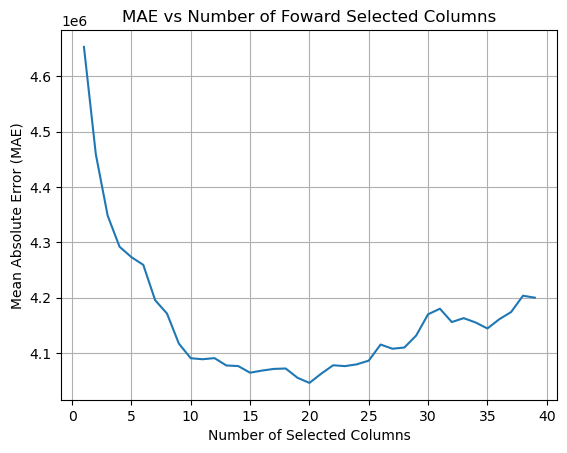

In [37]:
# Create a DataFrame to store the MAE values
mae_df = pd.DataFrame({'Num_Columns': range(1, 40), 'MAE': mae_values})

# Plotting the MAE values
plt.plot(mae_df['Num_Columns'], mae_df['MAE'])
plt.xlabel('Number of Selected Columns')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs Number of Foward Selected Columns')
plt.grid(True)
plt.show()

In [38]:
print(mae_df.iloc[19])

Num_Columns    2.000000e+01
MAE            4.045968e+06
Name: 19, dtype: float64


In [39]:
mae_values = []

for num_columns in range(1, 40):
    # Perform forward feature selection
    selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=num_columns, direction='backward')
    X_selected = selector.fit_transform(X, y_aav)

    # Fit a linear regression model
    model_aav = LinearRegression()
    predicted_aav = cross_val_predict(model_aav, X_selected, y_aav, cv=10)

    # Calculate MAE for AAV estimation
    mae_aav = mean_absolute_error(y_aav, predicted_aav)
    mae_values.append(mae_aav)

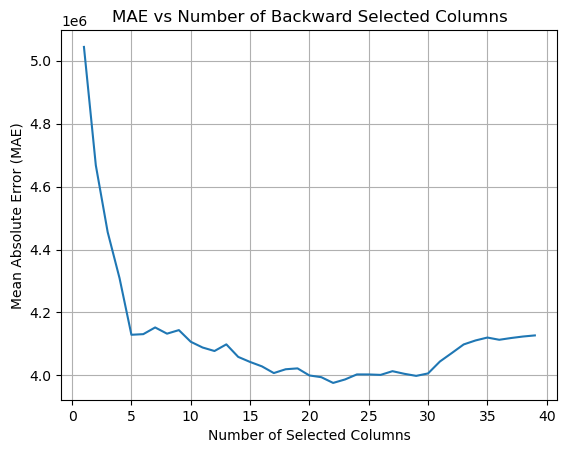

In [40]:
# Create a DataFrame to store the MAE values
mae_df = pd.DataFrame({'Num_Columns': range(1, 40), 'MAE': mae_values})

# Plotting the MAE values
plt.plot(mae_df['Num_Columns'], mae_df['MAE'])
plt.xlabel('Number of Selected Columns')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs Number of Backward Selected Columns')
plt.grid(True)
plt.show()

In [41]:
print(mae_df.iloc[21])

Num_Columns    2.200000e+01
MAE            3.976302e+06
Name: 21, dtype: float64


In [42]:
# Calculate final predictions using 22 backward selected features
# Perform forward feature selection
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=22, direction='backward')
X_selected = selector.fit_transform(X, y_aav)

In [43]:
# Get the selected feature indices
selected_feature_indices = selector.support_

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['GS', 'IP', 'K_9', 'BB_9', 'K_BB', 'HR_9', 'GB_FB', 'IFFB_pct', 'xFIP',
       'REW', 'pLI', 'inLI', 'wSF', 'O-Swing_pct', 'Swing_pct', 'xFIP-',
       'K_pct', 'LOB-Wins', 'FDP-Wins', 'Soft_pct', 'TTO_pct'],
      dtype='object')


In [44]:
# Fit a linear regression model
model_aav = LinearRegression()
predicted_aav = cross_val_predict(model_aav, X_selected, y_aav, cv=10)

# Calculate the difference between predicted and actual AAV
difference_aav = predicted_aav - y_aav

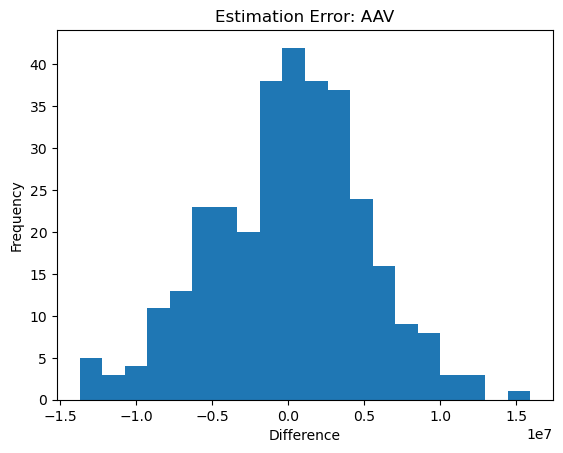

In [45]:
# Plot a histogram of the differences between predicted and actual AAV
plt.hist(difference_aav, bins=20)
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.title("Estimation Error: AAV")
plt.show()

In [46]:
mae_values = []

for num_columns in range(1, 40):
    # Perform forward feature selection
    selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=num_columns, direction='forward')
    X_selected = selector.fit_transform(X, y_years)

    # Fit a linear regression model
    model_years = LinearRegression()
    predicted_years = cross_val_predict(model_years, X_selected, y_years, cv=10)

    # Calculate MAE for Years estimation
    mae_years = mean_absolute_error(y_years, predicted_years)
    mae_values.append(mae_years)

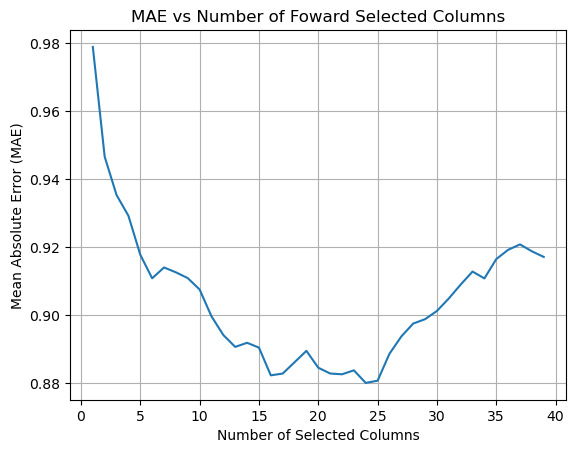

In [47]:
# Create a DataFrame to store the MAE values
mae_df_years = pd.DataFrame({'Num_Columns': range(1, 40), 'MAE': mae_values})

# Plotting the MAE values
plt.plot(mae_df_years['Num_Columns'], mae_df_years['MAE'])
plt.xlabel('Number of Selected Columns')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs Number of Foward Selected Columns')
plt.grid(True)
plt.show()

In [48]:
print(mae_df_years.iloc[23])

Num_Columns    24.000000
MAE             0.880056
Name: 23, dtype: float64


In [49]:
mae_values = []

for num_columns in range(1, 40):
    # Perform forward feature selection
    selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=num_columns, direction='backward')
    X_selected = selector.fit_transform(X, y_years)

    # Fit a linear regression model
    model_years = LinearRegression()
    predicted_years = cross_val_predict(model_years, X_selected, y_years, cv=10)

    # Calculate MAE for Years estimation
    mae_years = mean_absolute_error(y_years, predicted_years)
    mae_values.append(mae_years)

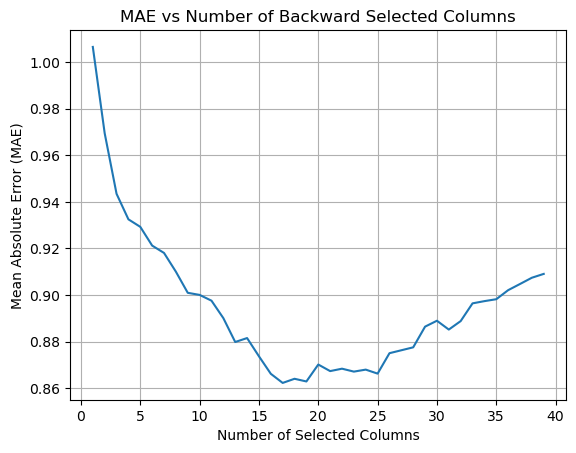

In [50]:
# Create a DataFrame to store the MAE values
mae_df_years = pd.DataFrame({'Num_Columns': range(1, 40), 'MAE': mae_values})

# Plotting the MAE values
plt.plot(mae_df_years['Num_Columns'], mae_df_years['MAE'])
plt.xlabel('Number of Selected Columns')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs Number of Backward Selected Columns')
plt.grid(True)
plt.show()

In [51]:
print(mae_df_years.iloc[16])
print(mae_df_years.iloc[18])

Num_Columns    17.000000
MAE             0.862311
Name: 16, dtype: float64
Num_Columns    19.000000
MAE             0.862936
Name: 18, dtype: float64


In [52]:
# Calculate final predictions using 17 backward selected features
# Perform forward feature selection
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=17, direction='backward')
X_selected = selector.fit_transform(X, y_years)

In [53]:
# Get the selected feature indices
selected_feature_indices = selector.support_

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['AVG', 'xFIP', 'WPA_minus', 'RE24', 'REW', 'gmLI', 'O-Swing_pct',
       'Z-Swing_pct', 'Swing_pct', 'Z-Contact_pct', 'Zone_pct', 'SwStr_pct',
       'FIP-', 'E-F', 'LOB-Wins', 'FDP-Wins', 'Age'],
      dtype='object')


In [54]:
model_years = LinearRegression()
predicted_years = cross_val_predict(model_years, X_selected, y_years, cv=10)

# Calculate the absolute difference between predicted and actual Years
difference_years = predicted_years - y_years

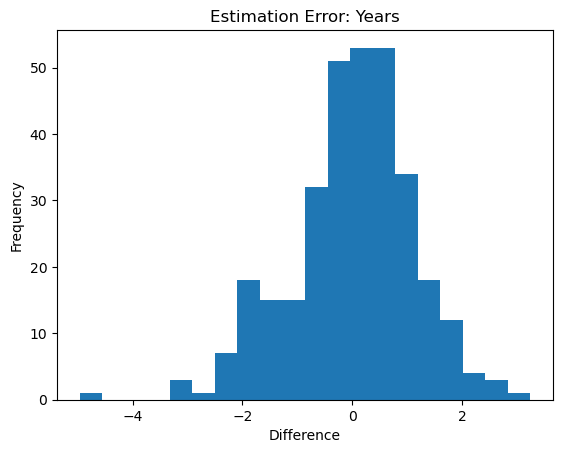

In [55]:
# Plot a histogram of the differences between predicted and actual Years
plt.hist(difference_years, bins=20)
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.title("Estimation Error: Years")
plt.show()

In [56]:
# Create a DataFrame for the model predictions and differences
SP_model_predictions = df[["Name", "AAV", "Years"]].copy()

# Add the predicted AAV and AAV difference columns
SP_model_predictions["Predicted_AAV"] = predicted_aav
SP_model_predictions["AAV_Difference"] = difference_aav

# Add the predicted Years and Years difference columns
SP_model_predictions["Predicted_Years"] = predicted_years
SP_model_predictions["Years_Difference"] = difference_years

# Export the DataFrame to a CSV file
SP_model_predictions.to_csv("SP_Model_Predictions.csv", index=False)

In [57]:
# Read the Relief Pitcher CSV file into a pandas DataFrame
df = pd.read_csv("RP_Training_Data.csv")

In [58]:
# Replace all NaN values with 0
df = df.fillna(0)

In [59]:
# shuffle the DataFrame rows
df = df.sample(frac = 1)

In [60]:
# Create the training set with the specified columns
training_features = df.drop(["Name", "AAV", "Years", "Position"], axis=1)

In [61]:
training_features

,W,L,ERA,SV,BS,ShO,IP,TBF,Balls,Strikes,...,FDP-Wins,K-BB_pct,Pull_pct,Cent_pct,Oppo_pct,Soft_pct,Med_pct,Hard_pct,TTO_pct,Age
297,1.000000,2.000000,6.605000,0.000000,0.000000,0,30.500000,140.000000,222.500000,335.500000,...,0.250000,1.350000,56.700000,26.700000,16.550000,21.050000,43.050000,35.950000,37.950000,33
85,2.000000,1.000000,3.765000,0.000000,1.000000,0,35.050000,150.500000,190.000000,337.500000,...,0.600000,6.400000,39.900000,35.600000,24.450000,22.050000,53.050000,24.950000,25.400000,38
222,3.000000,2.000000,4.273333,1.666667,1.666667,0,62.100000,253.666667,335.000000,673.333333,...,0.266667,21.133333,38.566667,32.700000,28.766667,16.300000,48.900000,34.833333,35.533333,35
264,3.250000,2.000000,2.555000,4.500000,2.250000,0,56.325000,222.750000,322.750000,561.500000,...,0.275000,22.325000,40.150000,34.600000,25.250000,19.250000,48.375000,32.375000,35.600000,35
43,3.250000,2.750000,3.097500,9.750000,3.500000,0,68.625000,269.500000,299.500000,684.500000,...,0.700000,17.700000,42.150000,36.650000,21.200000,16.450000,53.375000,30.150000,27.925000,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,2.000000,2.800000,5.703333,18.666667,2.666667,0,50.533333,219.566667,282.100000,587.200000,...,0.186667,17.966667,36.966667,31.866667,31.166667,16.533333,45.800000,37.666667,37.900000,37
365,2.333333,3.566667,3.236667,1.333333,3.800000,0,43.913333,183.700000,230.433333,469.100000,...,0.340000,18.433333,42.033333,32.133333,25.866667,18.766667,47.033333,34.200000,32.800000,31
216,4.000000,2.250000,2.537500,36.750000,3.750000,0,60.800000,240.000000,380.250000,670.250000,...,0.275000,30.425000,33.800000,31.775000,34.400000,16.575000,52.225000,31.200000,53.275000,31
378,0.000000,0.500000,7.995000,0.000000,0.500000,0,13.200000,65.500000,99.500000,165.500000,...,-0.050000,0.500000,35.650000,34.950000,29.400000,13.050000,51.700000,35.300000,31.500000,32


In [62]:
# Select the training features and target variable
X = training_features
y_aav = df["AAV"]
y_years = df["Years"]

In [63]:
mae_values = []

for num_columns in range(1, 40):
    # Perform forward feature selection
    selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=num_columns, direction='forward')
    X_selected = selector.fit_transform(X, y_aav)

    # Fit a linear regression model
    model_aav = LinearRegression()
    predicted_aav = cross_val_predict(model_aav, X_selected, y_aav, cv=10)
    
    # Calculate MAE for AAV estimation
    mae_aav = mean_absolute_error(y_aav, predicted_aav)
    mae_values.append(mae_aav)

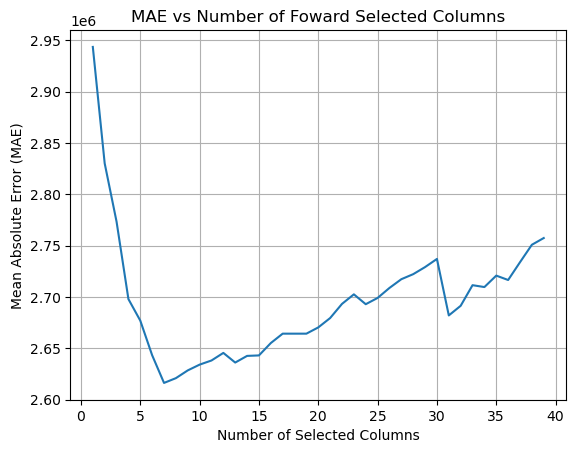

In [64]:
# Create a DataFrame to store the MAE values
mae_df = pd.DataFrame({'Num_Columns': range(1, 40), 'MAE': mae_values})

# Plotting the MAE values
plt.plot(mae_df['Num_Columns'], mae_df['MAE'])
plt.xlabel('Number of Selected Columns')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs Number of Foward Selected Columns')
plt.grid(True)
plt.show()

In [65]:
print(mae_df.iloc[6])

Num_Columns    7.000000e+00
MAE            2.616312e+06
Name: 6, dtype: float64


In [66]:
mae_values = []

for num_columns in range(1, 40):
    # Perform forward feature selection
    selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=num_columns, direction='backward')
    X_selected = selector.fit_transform(X, y_aav)

    # Fit a linear regression model
    model_aav = LinearRegression()
    predicted_aav = cross_val_predict(model_aav, X_selected, y_aav, cv=10)

    # Calculate MAE for AAV estimation
    mae_aav = mean_absolute_error(y_aav, predicted_aav)
    mae_values.append(mae_aav)

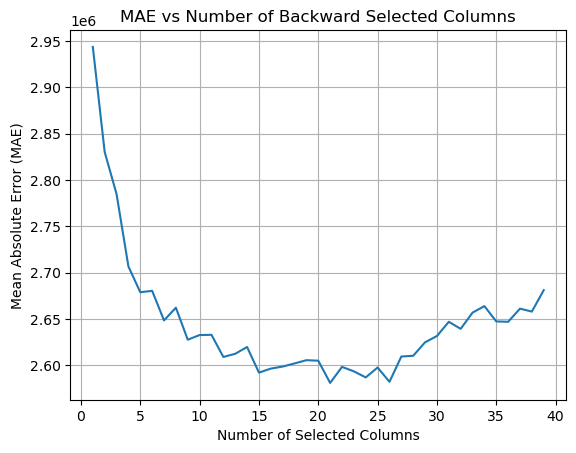

In [67]:
# Create a DataFrame to store the MAE values
mae_df = pd.DataFrame({'Num_Columns': range(1, 40), 'MAE': mae_values})

# Plotting the MAE values
plt.plot(mae_df['Num_Columns'], mae_df['MAE'])
plt.xlabel('Number of Selected Columns')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs Number of Backward Selected Columns')
plt.grid(True)
plt.show()

In [68]:
print(mae_df.iloc[20])
print(mae_df.iloc[25])

Num_Columns    2.100000e+01
MAE            2.580993e+06
Name: 20, dtype: float64
Num_Columns    2.600000e+01
MAE            2.582178e+06
Name: 25, dtype: float64


In [69]:
# Calculate final predictions using 21 backward selected features
# Perform forward feature selection
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=21, direction='backward')
X_selected = selector.fit_transform(X, y_aav)

In [70]:
# Get the selected feature indices
selected_feature_indices = selector.support_

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['L', 'Balls', 'Strikes', 'Pitches', 'BB_9', 'HR_9', 'AVG', 'FIP',
       'FB_pct', 'WPA', 'WPA_minus', 'pLI', 'inLI', 'wCB', 'BB_pct', 'RA9-WAR',
       'FDP-Wins', 'K-BB_pct', 'Oppo_pct', 'Hard_pct', 'Age'],
      dtype='object')


In [71]:
# Fit a linear regression model
model_aav = LinearRegression()
predicted_aav = cross_val_predict(model_aav, X_selected, y_aav, cv=10)

# Calculate the difference between predicted and actual AAV
difference_aav = predicted_aav - y_aav

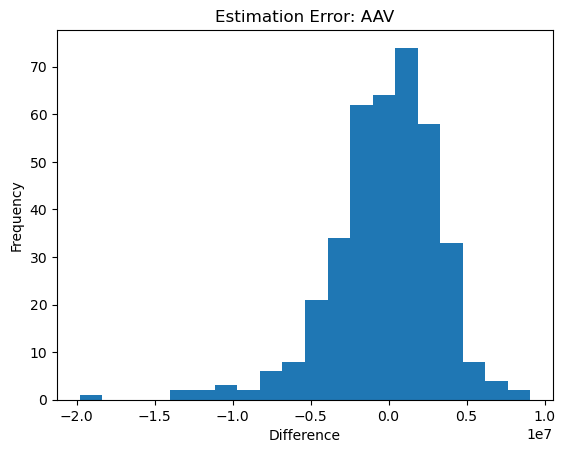

In [72]:
# Plot a histogram of the differences between predicted and actual AAV
plt.hist(difference_aav, bins=20)
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.title("Estimation Error: AAV")
plt.show()

In [73]:
mae_values = []

for num_columns in range(1, 40):
    # Perform forward feature selection
    selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=num_columns, direction='forward')
    X_selected = selector.fit_transform(X, y_years)

    # Fit a linear regression model
    model_years = LinearRegression()
    predicted_years = cross_val_predict(model_years, X_selected, y_years, cv=10)

    # Calculate MAE for Years estimation
    mae_years = mean_absolute_error(y_years, predicted_years)
    mae_values.append(mae_years)

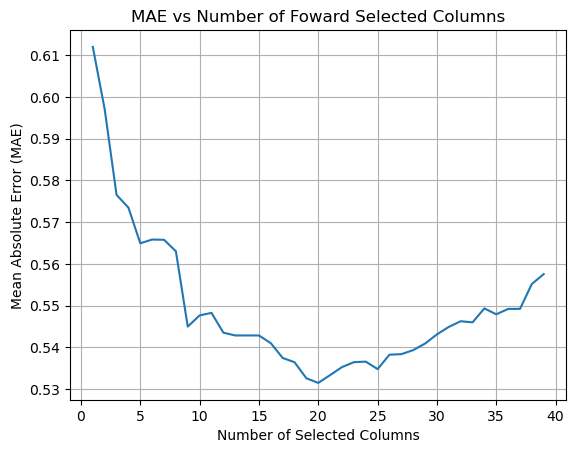

In [74]:
# Create a DataFrame to store the MAE values
mae_df_years = pd.DataFrame({'Num_Columns': range(1, 40), 'MAE': mae_values})

# Plotting the MAE values
plt.plot(mae_df_years['Num_Columns'], mae_df_years['MAE'])
plt.xlabel('Number of Selected Columns')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs Number of Foward Selected Columns')
plt.grid(True)
plt.show()

In [75]:
print(mae_df_years.iloc[19])

Num_Columns    20.00000
MAE             0.53149
Name: 19, dtype: float64


In [76]:
mae_values = []

for num_columns in range(1, 40):
    # Perform forward feature selection
    selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=num_columns, direction='backward')
    X_selected = selector.fit_transform(X, y_years)

    # Fit a linear regression model
    model_years = LinearRegression()
    predicted_years = cross_val_predict(model_years, X_selected, y_years, cv=10)

    # Calculate MAE for Years estimation
    mae_years = mean_absolute_error(y_years, predicted_years)
    mae_values.append(mae_years)

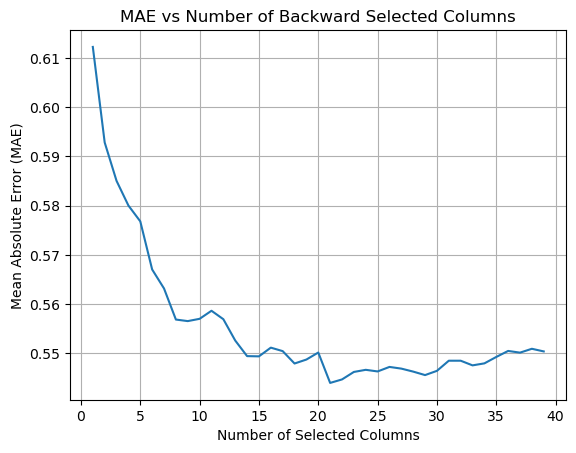

In [77]:
# Create a DataFrame to store the MAE values
mae_df_years = pd.DataFrame({'Num_Columns': range(1, 40), 'MAE': mae_values})

# Plotting the MAE values
plt.plot(mae_df_years['Num_Columns'], mae_df_years['MAE'])
plt.xlabel('Number of Selected Columns')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs Number of Backward Selected Columns')
plt.grid(True)
plt.show()

In [78]:
print(mae_df_years.iloc[20])

Num_Columns    21.000000
MAE             0.543966
Name: 20, dtype: float64


In [79]:
# Calculate final predictions using 20 foward selected features
# Perform forward feature selection
selector = SequentialFeatureSelector(LinearRegression(), n_features_to_select=20, direction='forward')
X_selected = selector.fit_transform(X, y_years)

In [80]:
# Get the selected feature indices
selected_feature_indices = selector.support_

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['SV', 'BS', 'ShO', 'IP', 'TBF', 'Strikes', 'HR_9', 'GB_FB', 'WAR',
       'xFIP', 'WPA', 'RE24', 'REW', 'wFB', 'wKN', 'O-Contact_pct', 'Zone_pct',
       'xFIP-', 'Oppo_pct', 'Age'],
      dtype='object')


In [81]:
model_years = LinearRegression()
predicted_years = cross_val_predict(model_years, X_selected, y_years, cv=10)

# Calculate the absolute difference between predicted and actual Years
difference_years = predicted_years - y_years

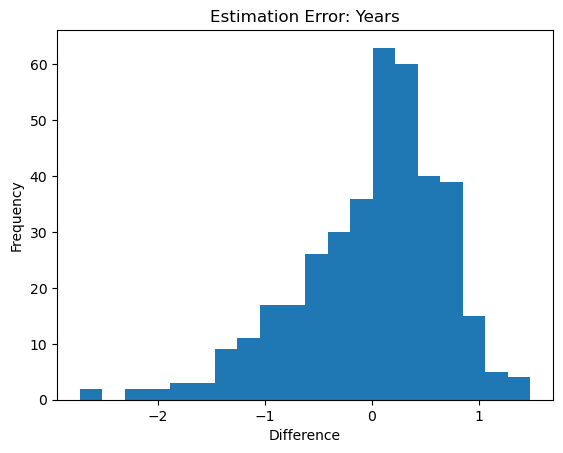

In [82]:
# Plot a histogram of the differences between predicted and actual Years
plt.hist(difference_years, bins=20)
plt.xlabel("Difference")
plt.ylabel("Frequency")
plt.title("Estimation Error: Years")
plt.show()

In [83]:
# Create a DataFrame for the model predictions and differences
RP_model_predictions = df[["Name", "AAV", "Years"]].copy()

# Add the predicted AAV and AAV difference columns
RP_model_predictions["Predicted_AAV"] = predicted_aav
RP_model_predictions["AAV_Difference"] = difference_aav

# Add the predicted Years and Years difference columns
RP_model_predictions["Predicted_Years"] = predicted_years
RP_model_predictions["Years_Difference"] = difference_years

# Export the DataFrame to a CSV file
RP_model_predictions.to_csv("RP_Model_Predictions.csv", index=False)